# Base Census
**Preveja se a renda excede US$ 50 mil/ano com base nos dados do censo. Também conhecido como conjunto de dados "Renda do Censo".**

A extração foi feita por Barry Becker do banco de dados do Censo de 1994. Um conjunto de registros razoavelmente limpos foi extraído usando as seguintes condições: ((AAGE>16) && (AGI>100) && (AFNLWGT>1)&& (HRSWK>0))

A tarefa de previsão é determinar se uma pessoa faz mais de 50K ano.

https://archive.ics.uci.edu/ml/datasets/adult

# #4 - Avaliação de Algoritmos

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
# Modelos de classificação
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.svm import SVC

In [3]:
# Objetos do sklearn
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import StratifiedShuffleSplit
from sklearn.model_selection import GridSearchCV
from sklearn.metrics import make_scorer, f1_score

In [4]:
# Outras Importações
import seaborn as sns
import pickle as pkl
import pandas as pd
import numpy as np
path = '/content/drive/MyDrive/Machine Learning e Data Science com Python/Projeto - Census/'

In [5]:
pd.set_option('max_columns', 50)
pd.set_option('max_rows', 150)

## Carregando dataset tratado

In [6]:
with open(path+'census_data_2.pkl', 'rb') as f:
  X_train, X_test, X_train_forest, X_test_forest, X_train_log_reg, X_test_log_reg, X_train_svm_lin, X_test_svm_lin, X_train_tree, X_test_tree, y_train, y_test = pkl.load(f)

X_train.shape, X_test.shape, X_train_forest.shape, X_test_forest.shape, X_train_log_reg.shape, X_test_log_reg.shape, X_train_svm_lin.shape, X_test_svm_lin.shape, X_train_tree.shape, X_test_tree.shape, y_train.shape, y_test.shape

((22792, 17),
 (9769, 17),
 (22792, 14),
 (9769, 14),
 (22792, 9),
 (9769, 9),
 (22792, 10),
 (9769, 10),
 (22792, 13),
 (9769, 13),
 (22792,),
 (9769,))

## Otimização de hiperparâmetros 
**OBS: Pelo fato da base de dados possuir 22.792 registros, a hiperparametrização é muito custosa para ser executado no Google Colab, com isso, o MLPClassifier não foi testado nessa etapa. Além disso, para facilitar a visualização, os hiperparâmetros testados abaixos foram os últimos executados após diversos testes de avaliação de algoritmos.**

- **Recall**: é usada para medir o desempenho do modelo ao medir a contagem de positivos verdadeiros de maneira correta de todos os valores positivos reais.  

- **Precision**: é usada para medir o desempenho do modelo ao medir a razão da soma de positivos verdadeiros e verdadeiros negativos de todas as previsões;  

- **F1-score**: é a média harmônica de precision e recall e é usada como uma métrica nos cenários em que a escolha de precisão ou pontuação de recall pode resultar em comprometimento em termos de modelo dando altos falsos positivos e falsos negativos, respectivamente.

In [7]:
metrics = {'f1_score': make_scorer(f1_score)}

StratifiedShuffleSplit é um objeto de validação cruzada que mescla StratifiedKFold e ShuffleSplit, que retorna dobras aleatórias estratificadas. As dobras são feitas preservando a porcentagem de amostras para cada classe.

In [8]:
cv = StratifiedShuffleSplit(n_splits = 10, test_size = 0.25)

### Decision Tree

In [ ]:
params_tree = {
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 8, 13, 16, 21],
    'min_samples_leaf': [61, 89, 98, 116],
    'class_weight': [{0:.3, 1:.7}, {0:.325, 1:.675}, {0:.35, 1:.65}, {0:.4, 1:.6}]
}

In [ ]:
grid_search_CV_tree = GridSearchCV(DecisionTreeClassifier(), scoring = metrics, param_grid = params_tree, n_jobs = 4, cv = cv, refit = False)
grid_search_CV_tree.fit(X_train_tree, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=DecisionTreeClassifier(), n_jobs=4,
             param_grid={'class_weight': [{0: 0.3, 1: 0.7},
                                          {0: 0.325, 1: 0.675},
                                          {0: 0.35, 1: 0.65},
                                          {0: 0.4, 1: 0.6}],
                         'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [61, 89, 98, 116],
                         'min_samples_split': [2, 5, 8, 13, 16, 21]},
             refit=False, scoring={'f1_score': make_scorer(f1_score)})

In [ ]:
results_tree = grid_search_CV_tree.cv_results_
results_tree = pd.DataFrame(data = results_tree, columns = results_tree.keys())
results_tree.sort_values(by = ['rank_test_f1_score'] , inplace = True)
results_tree.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_min_samples_leaf,param_min_samples_split,params,split0_test_f1_score,split1_test_f1_score,split2_test_f1_score,split3_test_f1_score,split4_test_f1_score,split5_test_f1_score,split6_test_f1_score,split7_test_f1_score,split8_test_f1_score,split9_test_f1_score,mean_test_f1_score,std_test_f1_score,rank_test_f1_score
174,0.211981,0.007660,0.020029,0.004168,"{0: 0.4, 1: 0.6}",entropy,89,2,"{'class_weight': {0: 0.4, 1: 0.6}, 'criterion'...",0.697482,0.680058,0.685119,0.692758,0.694573,0.696525,0.690909,0.684922,0.675045,0.68139,0.687878,0.007274,1
176,0.210261,0.031846,0.018489,0.006057,"{0: 0.4, 1: 0.6}",entropy,89,8,"{'class_weight': {0: 0.4, 1: 0.6}, 'criterion'...",0.697482,0.680058,0.685119,0.692758,0.694573,0.696525,0.690909,0.684922,0.675045,0.68139,0.687878,0.007274,1
177,0.216941,0.013734,0.019894,0.004881,"{0: 0.4, 1: 0.6}",entropy,89,13,"{'class_weight': {0: 0.4, 1: 0.6}, 'criterion'...",0.697482,0.680058,0.685119,0.692758,0.694573,0.696525,0.690909,0.684922,0.675045,0.68139,0.687878,0.007274,1
178,0.220966,0.064692,0.016155,0.008539,"{0: 0.4, 1: 0.6}",entropy,89,16,"{'class_weight': {0: 0.4, 1: 0.6}, 'criterion'...",0.697482,0.680058,0.685119,0.692758,0.694573,0.696525,0.690909,0.684922,0.675045,0.68139,0.687878,0.007274,1
179,0.204112,0.037648,0.018613,0.003290,"{0: 0.4, 1: 0.6}",entropy,89,21,"{'class_weight': {0: 0.4, 1: 0.6}, 'criterion'...",0.697482,0.680058,0.685119,0.692758,0.694573,0.696525,0.690909,0.684922,0.675045,0.68139,0.687878,0.007274,1


In [ ]:
best_params_tree = results_tree['params'].head(1).values[0]
best_params_tree

{'class_weight': {0: 0.4, 1: 0.6},
 'criterion': 'entropy',
 'min_samples_leaf': 89,
 'min_samples_split': 2}

### Random Forest

In [ ]:
params_forest = {
    'n_estimators': [34, 55, 89, 100, 144],
    'criterion': ['gini', 'entropy'],
    'min_samples_split': [2, 5, 8, 13],
    'min_samples_leaf': [1, 3, 5, 8],
    'max_features': [None],
    'class_weight': [{0:.325, 1:.675}, {0:.35, 1:.65}, {0:.45, 1:.55}, {0:.4, 1:.6}]
}

In [ ]:
grid_search_CV_forest = GridSearchCV(RandomForestClassifier(), scoring = metrics, param_grid = params_tree, n_jobs = 4, cv = cv, refit = False)
grid_search_CV_forest.fit(X_train_forest, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=RandomForestClassifier(), n_jobs=4,
             param_grid={'class_weight': [{0: 0.325, 1: 0.675},
                                          {0: 0.35, 1: 0.65},
                                          {0: 0.45, 1: 0.55},
                                          {0: 0.4, 1: 0.6}],
                         'criterion': ['gini', 'entropy'],
                         'min_samples_leaf': [1, 3, 5, 8],
                         'min_samples_split': [2, 5, 8, 13]},
             refit=False, scoring={'f1_score': make_scorer(f1_score)})

In [ ]:
results_forest = grid_search_CV_forest.cv_results_
results_forest = pd.DataFrame(data = results_forest, columns = results_forest.keys())
results_forest.sort_values(by = ['rank_test_f1_score'] , inplace = True)
results_forest.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_criterion,param_min_samples_leaf,param_min_samples_split,params,split0_test_f1_score,split1_test_f1_score,split2_test_f1_score,split3_test_f1_score,split4_test_f1_score,split5_test_f1_score,split6_test_f1_score,split7_test_f1_score,split8_test_f1_score,split9_test_f1_score,mean_test_f1_score,std_test_f1_score,rank_test_f1_score
5,4.632229,0.064366,0.310002,0.012003,"{0: 0.325, 1: 0.675}",gini,3,5,"{'class_weight': {0: 0.325, 1: 0.675}, 'criter...",0.721381,0.740007,0.722807,0.721265,0.711937,0.730729,0.728421,0.708348,0.716522,0.712127,0.721354,0.009242,1
36,4.688134,0.076085,0.329058,0.026544,"{0: 0.35, 1: 0.65}",gini,3,2,"{'class_weight': {0: 0.35, 1: 0.65}, 'criterio...",0.720000,0.743968,0.719573,0.730866,0.705109,0.733094,0.726748,0.709861,0.713879,0.705714,0.720881,0.012116,2
54,6.036227,0.068257,0.309530,0.010756,"{0: 0.35, 1: 0.65}",entropy,3,8,"{'class_weight': {0: 0.35, 1: 0.65}, 'criterio...",0.716817,0.742692,0.717143,0.724607,0.706395,0.734987,0.732303,0.711477,0.713376,0.708053,0.720785,0.011699,3
7,4.538516,0.047340,0.310495,0.011216,"{0: 0.325, 1: 0.675}",gini,3,13,"{'class_weight': {0: 0.325, 1: 0.675}, 'criter...",0.720841,0.745398,0.718217,0.720938,0.712416,0.731927,0.730070,0.703972,0.711034,0.712858,0.720767,0.011547,4
39,4.545706,0.067698,0.314741,0.008954,"{0: 0.35, 1: 0.65}",gini,3,13,"{'class_weight': {0: 0.35, 1: 0.65}, 'criterio...",0.722362,0.744931,0.720676,0.720823,0.704398,0.727338,0.729479,0.711613,0.712562,0.710860,0.720504,0.011054,5


In [ ]:
best_params_forest = results_forest['params'].head(1).values[0]
best_params_forest

{'class_weight': {0: 0.325, 1: 0.675},
 'criterion': 'gini',
 'min_samples_leaf': 3,
 'min_samples_split': 5}

### KNN

In [ ]:
params_knn = {'n_neighbors': [3, 5, 8, 13],
              'weights': ['uniform', 'distance'],
              'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute', 'auto'],
              'leaf_size': [10, 25, 30, 35],
              'p': [1, 2]}

In [ ]:
grid_search_CV_knn = GridSearchCV(KNeighborsClassifier(), scoring = metrics, param_grid = params_knn, n_jobs = -1, cv = cv, refit = False)
grid_search_CV_knn.fit(X_train, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=KNeighborsClassifier(), n_jobs=-1,
             param_grid={'algorithm': ['auto', 'ball_tree', 'kd_tree', 'brute',
                                       'auto'],
                         'leaf_size': [10, 25, 30, 35],
                         'n_neighbors': [3, 5, 8, 13], 'p': [1, 2],
                         'weights': ['uniform', 'distance']},
             refit=False, scoring={'f1_score': make_scorer(f1_score)})

In [ ]:
results_knn = grid_search_CV_knn.cv_results_
results_knn = pd.DataFrame(data = results_knn, columns = results_knn.keys())
results_knn.sort_values(by = ['rank_test_f1_score'] , inplace = True)
results_knn.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_algorithm,param_leaf_size,param_n_neighbors,param_p,param_weights,params,split0_test_f1_score,split1_test_f1_score,split2_test_f1_score,split3_test_f1_score,split4_test_f1_score,split5_test_f1_score,split6_test_f1_score,split7_test_f1_score,split8_test_f1_score,split9_test_f1_score,mean_test_f1_score,std_test_f1_score,rank_test_f1_score
60,0.009653,0.000343,3.624691,0.089890,auto,35,13,1,uniform,"{'algorithm': 'auto', 'leaf_size': 35, 'n_neig...",0.640862,0.651515,0.645997,0.649842,0.647865,0.633655,0.641916,0.649647,0.637119,0.645059,0.644348,0.005567,1
188,0.060418,0.002754,3.916228,0.036492,kd_tree,35,13,1,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 35, 'n_n...",0.640862,0.651515,0.645997,0.649842,0.647865,0.633655,0.641916,0.649647,0.637119,0.645059,0.644348,0.005567,1
204,0.009528,0.000537,3.741513,0.296258,brute,10,13,1,uniform,"{'algorithm': 'brute', 'leaf_size': 10, 'n_nei...",0.640862,0.651515,0.645997,0.649842,0.647865,0.633655,0.641916,0.649647,0.637119,0.645059,0.644348,0.005567,1
172,0.069876,0.007388,4.354344,0.056881,kd_tree,30,13,1,uniform,"{'algorithm': 'kd_tree', 'leaf_size': 30, 'n_n...",0.640862,0.651515,0.645997,0.649842,0.647865,0.633655,0.641916,0.649647,0.637119,0.645059,0.644348,0.005567,1
220,0.009649,0.000328,3.631492,0.083115,brute,25,13,1,uniform,"{'algorithm': 'brute', 'leaf_size': 25, 'n_nei...",0.640862,0.651515,0.645997,0.649842,0.647865,0.633655,0.641916,0.649647,0.637119,0.645059,0.644348,0.005567,1


In [ ]:
best_params_knn = results_knn['params'].head(1).values[0]
best_params_knn

{'algorithm': 'auto',
 'leaf_size': 35,
 'n_neighbors': 13,
 'p': 1,
 'weights': 'uniform'}

### Logistic Regression

In [ ]:
params_log_reg = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'tol': [0.001, 0.0001, 0.00001],
    'C': (0.2, 0.3, 0.5, 0.8, 1.3, 2.1),
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'multi_class': ['auto', 'ovr', 'multinomial']
}

In [ ]:
grid_search_CV_log_reg = GridSearchCV(LogisticRegression(), scoring = metrics, param_grid = params_log_reg, n_jobs = 4, cv = cv, refit = False)
grid_search_CV_log_reg.fit(X_train_log_reg, y_train)

In [ ]:
results_log_reg = grid_search_CV_log_reg.cv_results_
results_log_reg = pd.DataFrame(data = results_log_reg, columns = results_log_reg.keys())
results_log_reg.sort_values(by = ['rank_test_f1_score'] , inplace = True)
results_log_reg.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_multi_class,param_penalty,param_solver,param_tol,params,split0_test_f1_score,split1_test_f1_score,split2_test_f1_score,split3_test_f1_score,split4_test_f1_score,split5_test_f1_score,split6_test_f1_score,split7_test_f1_score,split8_test_f1_score,split9_test_f1_score,mean_test_f1_score,std_test_f1_score,rank_test_f1_score
1077,0.322640,0.023680,0.015199,0.002817,2.1,multinomial,none,saga,0.001,"{'C': 2.1, 'multi_class': 'multinomial', 'pena...",0.660454,0.646253,0.669335,0.660729,0.649330,0.674755,0.649172,0.656537,0.659498,0.678129,0.660419,0.010319,1
174,0.642107,0.207429,0.016315,0.004621,0.2,multinomial,none,sag,0.001,"{'C': 0.2, 'multi_class': 'multinomial', 'pena...",0.659063,0.645707,0.668800,0.658269,0.648715,0.683115,0.646267,0.655489,0.658983,0.677925,0.660233,0.012157,2
594,0.271822,0.040733,0.013004,0.002770,0.8,auto,none,sag,0.001,"{'C': 0.8, 'multi_class': 'auto', 'penalty': '...",0.660186,0.645213,0.669068,0.663458,0.648163,0.680341,0.646003,0.654108,0.657337,0.676886,0.660076,0.011788,3
1014,0.259117,0.029214,0.015271,0.004915,2.1,ovr,none,sag,0.001,"{'C': 2.1, 'multi_class': 'ovr', 'penalty': 'n...",0.660186,0.646822,0.669068,0.661824,0.649330,0.676539,0.646292,0.653846,0.659253,0.677380,0.660054,0.010840,4
114,0.259925,0.030308,0.016060,0.003962,0.2,ovr,none,sag,0.001,"{'C': 0.2, 'multi_class': 'ovr', 'penalty': 'n...",0.661818,0.644875,0.668265,0.662102,0.651840,0.674228,0.645953,0.655489,0.658167,0.677706,0.660044,0.010528,5


In [ ]:
best_params_log_reg = results_log_reg['params'].head(1).values[0]
best_params_log_reg

{'C': 2.1,
 'multi_class': 'multinomial',
 'penalty': 'none',
 'solver': 'saga',
 'tol': 0.001}

### SVM Linear

In [ ]:
params_svm_lin = {
    'C': [1.3, 2.1, 3.4],
    'tol': [0.0001, 0.00001],
    'kernel': ['linear'],
    'gamma': ['scale', 'auto'],
    'class_weight': [{0: .325, 1: .675}, {0: .35, 1: .65}],
    'decision_function_shape': ['ovo', 'ovr']
}

In [ ]:
grid_search_CV_svm_lin = GridSearchCV(SVC(), scoring = metrics, param_grid = params_svm_lin, n_jobs = -1, cv = cv, refit = False)
grid_search_CV_svm_lin.fit(X_train_svm_lin, y_train)

GridSearchCV(cv=StratifiedShuffleSplit(n_splits=10, random_state=None, test_size=0.25,
            train_size=None),
             estimator=SVC(), n_jobs=-1,
             param_grid={'C': [1.3, 2.1, 3.4],
                         'class_weight': [{0: 0.3, 1: 0.7},
                                          {0: 0.325, 1: 0.675},
                                          {0: 0.35, 1: 0.65}],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'gamma': ['scale', 'auto'], 'kernel': ['linear'],
                         'tol': [0.0001, 1e-05]},
             refit=False, scoring={'f1_score': make_scorer(f1_score)})

In [ ]:
results_svm_lin = grid_search_CV_svm_lin.cv_results_
results_svm_lin = pd.DataFrame(data = results_svm_lin, columns = results_svm_lin.keys())
results_svm_lin.sort_values(by = ['rank_test_f1_score'] , inplace = True)
results_svm_lin.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_C,param_class_weight,param_decision_function_shape,param_gamma,param_kernel,param_tol,params,split0_test_f1_score,split1_test_f1_score,split2_test_f1_score,split3_test_f1_score,split4_test_f1_score,split5_test_f1_score,split6_test_f1_score,split7_test_f1_score,split8_test_f1_score,split9_test_f1_score,mean_test_f1_score,std_test_f1_score,rank_test_f1_score
38,6.200393,0.102357,1.227990,0.010680,2.1,"{0: 0.325, 1: 0.675}",ovr,auto,linear,0.0001,"{'C': 2.1, 'class_weight': {0: 0.325, 1: 0.675...",0.677035,0.677944,0.68536,0.683055,0.683420,0.685037,0.700977,0.676974,0.682863,0.684608,0.683727,0.006541,1
36,6.186996,0.103672,1.225320,0.016524,2.1,"{0: 0.325, 1: 0.675}",ovr,scale,linear,0.0001,"{'C': 2.1, 'class_weight': {0: 0.325, 1: 0.675...",0.677035,0.677944,0.68536,0.683055,0.683420,0.685037,0.700977,0.676974,0.682863,0.684608,0.683727,0.006541,1
34,6.314389,0.256243,1.372872,0.296127,2.1,"{0: 0.325, 1: 0.675}",ovo,auto,linear,0.0001,"{'C': 2.1, 'class_weight': {0: 0.325, 1: 0.675...",0.677035,0.677944,0.68536,0.683055,0.683420,0.685037,0.700977,0.676974,0.682863,0.684608,0.683727,0.006541,1
32,6.276717,0.192875,1.411820,0.374442,2.1,"{0: 0.325, 1: 0.675}",ovo,scale,linear,0.0001,"{'C': 2.1, 'class_weight': {0: 0.325, 1: 0.675...",0.677035,0.677944,0.68536,0.683055,0.683420,0.685037,0.700977,0.676974,0.682863,0.684608,0.683727,0.006541,1
35,6.178812,0.079421,1.227888,0.010458,2.1,"{0: 0.325, 1: 0.675}",ovo,auto,linear,0.00001,"{'C': 2.1, 'class_weight': {0: 0.325, 1: 0.675...",0.677035,0.677944,0.68536,0.683055,0.683197,0.685256,0.700977,0.676974,0.682863,0.684608,0.683727,0.006547,5


In [ ]:
best_params_svm_lin = results_svm_lin['params'].head(1).values[0]
best_params_svm_lin

{'C': 2.1,
 'class_weight': {0: 0.325, 1: 0.675},
 'decision_function_shape': 'ovr',
 'gamma': 'auto',
 'kernel': 'linear',
 'tol': 0.0001}

### SVM

In [ ]:
params_svm = {
    'kernel': ['rbf', 'poly', 'sigmoid'],
    'class_weight': ['balanced'],
    'decision_function_shape': ['ovo', 'ovr']
}

In [ ]:
grid_search_CV_svm = GridSearchCV(SVC(), scoring = metrics, param_grid = params_svm, n_jobs = 4, cv = StratifiedShuffleSplit(n_splits = 8, test_size = 0.25), refit = False, verbose = 1)
grid_search_CV_svm.fit(X_train, y_train)

Fitting 8 folds for each of 6 candidates, totalling 48 fits


GridSearchCV(cv=StratifiedShuffleSplit(n_splits=8, random_state=None, test_size=0.25,
            train_size=None),
             estimator=SVC(), n_jobs=4,
             param_grid={'class_weight': ['balanced'],
                         'decision_function_shape': ['ovo', 'ovr'],
                         'kernel': ['rbf', 'poly', 'sigmoid']},
             refit=False, scoring={'f1_score': make_scorer(f1_score)},
             verbose=1)

In [ ]:
results_svm = grid_search_CV_svm.cv_results_
results_svm = pd.DataFrame(data = results_svm, columns = results_svm.keys())
results_svm.sort_values(by = ['rank_test_f1_score'] , inplace = True)
results_svm.head()

,mean_fit_time,std_fit_time,mean_score_time,std_score_time,param_class_weight,param_decision_function_shape,param_kernel,params,split0_test_f1_score,split1_test_f1_score,split2_test_f1_score,split3_test_f1_score,split4_test_f1_score,split5_test_f1_score,split6_test_f1_score,split7_test_f1_score,mean_test_f1_score,std_test_f1_score,rank_test_f1_score
1,30.807087,0.974276,4.715308,0.417033,balanced,ovo,poly,"{'class_weight': 'balanced', 'decision_functio...",0.670986,0.680672,0.667995,0.670183,0.674470,0.671853,0.658778,0.676586,0.671441,0.006073,1
4,32.030710,2.082207,5.053767,0.750614,balanced,ovr,poly,"{'class_weight': 'balanced', 'decision_functio...",0.670986,0.680672,0.667995,0.670183,0.674470,0.671853,0.658778,0.676586,0.671441,0.006073,1
0,45.613522,0.855651,10.172144,0.097154,balanced,ovo,rbf,"{'class_weight': 'balanced', 'decision_functio...",0.664071,0.678670,0.666290,0.670315,0.669216,0.666849,0.657959,0.670354,0.667966,0.005553,3
3,49.673873,3.009599,12.247313,1.459564,balanced,ovr,rbf,"{'class_weight': 'balanced', 'decision_functio...",0.664071,0.678670,0.666290,0.670315,0.669216,0.666849,0.657959,0.670354,0.667966,0.005553,3
2,114.599395,15.886600,9.985855,2.741768,balanced,ovo,sigmoid,"{'class_weight': 'balanced', 'decision_functio...",0.527313,0.538290,0.539656,0.541552,0.542493,0.536426,0.251826,0.252919,0.466309,0.123593,5


In [ ]:
best_params_svm = results_svm['params'].head(1).values[0]
best_params_svm

{'class_weight': 'balanced',
 'decision_function_shape': 'ovo',
 'kernel': 'poly'}

## Validação Cruzada com os hiperparâmetros encontrados
30 testes com validação cruzada é um valor bem aceito na comunidade científica.

In [21]:
results_tree     = list()
results_forest   = list()
results_knn      = list()
results_log_reg  = list()
results_svm_lin  = list()
results_svm      = list()

In [22]:
import warnings
warnings.simplefilter(action='ignore', category=Warning)

for i in range(30):
  print(f'Teste número: {i+1}')

  cv = StratifiedShuffleSplit(n_splits = 10, test_size = 0.25, random_state = i)

  model_tree         = DecisionTreeClassifier(criterion = 'entropy', class_weight = {0: 0.4, 1: 0.6}, min_samples_leaf = 89, min_samples_split = 2)
  model_forest       = RandomForestClassifier(criterion = 'gini', class_weight = {0: 0.325, 1: 0.675}, min_samples_leaf = 3, min_samples_split = 5)
  model_knn          = KNeighborsClassifier(algorithm = 'auto', leaf_size = 35, n_neighbors = 13, p = 1, weights = 'uniform')
  model_log_reg      = LogisticRegression(C = 2.1, multi_class = 'multinomial', penalty = 'none', solver = 'saga', tol = 0.001)
  model_svm_lin      = SVC(C = 2.1, decision_function_shape = 'ovr', gamma = 'auto', kernel = 'linear', tol = .0001, class_weight = {0: 0.325, 1: 0.675})
  model_svm          = SVC(class_weight = 'balanced', kernel = 'poly', decision_function_shape = 'ovo')

  score_tree         = cross_val_score(model_tree   , X_train_tree   , y_train, cv = cv, scoring = 'f1')
  score_forest       = cross_val_score(model_forest , X_train_forest , y_train, cv = cv, scoring = 'f1')
  score_knn          = cross_val_score(model_knn    , X_train        , y_train, cv = cv, scoring = 'f1')
  score_log_reg      = cross_val_score(model_log_reg, X_train_log_reg, y_train, cv = cv, scoring = 'f1')
  score_svm_lin      = cross_val_score(model_svm_lin, X_train_svm_lin, y_train, cv = cv, scoring = 'f1')
  score_svm          = cross_val_score(model_svm    , X_train        , y_train, cv = cv, scoring = 'f1')

  # Média da acurácia das 10 divisões
  results_tree.append(score_tree.mean())
  results_forest.append(score_forest.mean())
  results_knn.append(score_knn.mean())
  results_log_reg.append(score_log_reg.mean())
  results_svm_lin.append(score_svm_lin.mean())
  results_svm.append(score_svm.mean())

Teste número: 1
Teste número: 2
Teste número: 3
Teste número: 4
Teste número: 5
Teste número: 6
Teste número: 7
Teste número: 8
Teste número: 9
Teste número: 10
Teste número: 11
Teste número: 12
Teste número: 13
Teste número: 14
Teste número: 15
Teste número: 16
Teste número: 17
Teste número: 18
Teste número: 19
Teste número: 20
Teste número: 21
Teste número: 22
Teste número: 23
Teste número: 24
Teste número: 25
Teste número: 26
Teste número: 27
Teste número: 28
Teste número: 29
Teste número: 30


In [23]:
results = pd.DataFrame({'Tree': results_tree,
                        'Forest': results_forest,
                        'KNN': results_knn,
                        'Logistic': results_log_reg,
                        'SVM_lin': results_svm_lin,
                        'SVM': results_svm})
results

,Tree,Forest,KNN,Logistic,SVM_lin,SVM
0,0.688716,0.719656,0.647821,0.654179,0.683053,0.668725
1,0.685405,0.718911,0.649026,0.659899,0.681843,0.670803
2,0.690983,0.720260,0.647748,0.659031,0.683546,0.673287
3,0.693973,0.722633,0.649209,0.659796,0.686056,0.672900
4,0.687903,0.719807,0.646358,0.654574,0.682490,0.672699
5,0.687174,0.716502,0.642294,0.650988,0.683294,0.672011
6,0.693345,0.722266,0.647849,0.656521,0.689413,0.672171
7,0.690748,0.720051,0.645206,0.658615,0.684655,0.672975
8,0.686397,0.717715,0.645332,0.655155,0.682153,0.671231
9,0.687229,0.718204,0.645771,0.653545,0.680891,0.671133


O modelo Random Forest obteve o melhor f1-score entre todos os modelos (71%), além disso, ele obteve o 2º melhor desvio padrão (0,27%), ficando atrás somente do SVM (0,16%)

In [24]:
results.describe()

,Tree,Forest,KNN,Logistic,SVM_lin,SVM
count,30.000000,30.000000,30.000000,30.000000,30.000000,30.000000
mean,0.688575,0.718618,0.645689,0.655257,0.682840,0.671410
std,0.003016,0.002530,0.002711,0.002767,0.002721,0.001662
min,0.682695,0.713353,0.640230,0.650988,0.677605,0.667828
25%,0.686399,0.717058,0.644014,0.653319,0.680918,0.670460
50%,0.687901,0.718811,0.645756,0.654613,0.682865,0.671644
75%,0.690962,0.720185,0.647490,0.657572,0.683627,0.672638
max,0.693973,0.724317,0.651123,0.659899,0.689413,0.675009


Coeficiente de variação: variação dos dados em relação à média

In [25]:
( results.std() / results.mean() ) * 100

Tree        0.438065
Forest      0.352013
KNN         0.419921
Logistic    0.422295
SVM_lin     0.398550
SVM         0.247503
dtype: float64

## Teste de normalidade dos resultados
Os algoritmos <x> e <y> possuem desempenhos próximos.  
Para realizar os testes de hipóteses, é obrigatório que os dados estejam numa distribuição normal. Os algoritmos com resultados que não possuem distribuição normal, deve-se utilizar outros conceitos estatísticos chamados testes não paramétricos.



In [26]:
alpha = 0.05
h0 = 'Resultados possuem uma distibuição normal'
h1 = 'Resultados NÃO possuem uma distibuição normal'

In [27]:
from scipy.stats import shapiro
def shapiro_test(results_model, name_model, alpha):
  test = shapiro(results_model)
  return {name_model: [round(test[1], 2), h0 if test[1] > alpha else h1]}

In [28]:
for model in results.columns:
  print( shapiro_test(results[model].to_list(), model, alpha) )

{'Tree': [0.33, 'Resultados possuem uma distibuição normal']}
{'Forest': [0.98, 'Resultados possuem uma distibuição normal']}
{'KNN': [0.89, 'Resultados possuem uma distibuição normal']}
{'Logistic': [0.1, 'Resultados possuem uma distibuição normal']}
{'SVM_lin': [0.1, 'Resultados possuem uma distibuição normal']}
{'SVM': [0.68, 'Resultados possuem uma distibuição normal']}


Tree
Forest
KNN
Logistic
SVM_lin
SVM


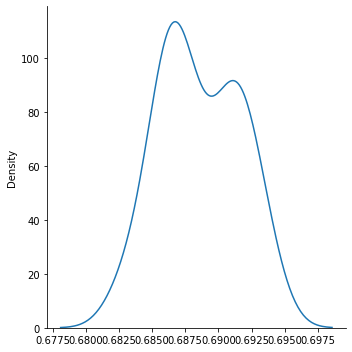

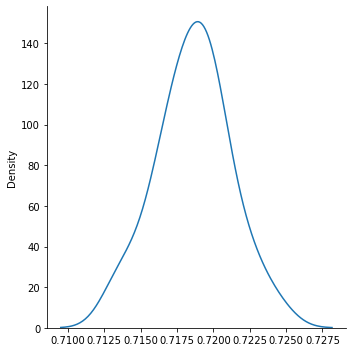

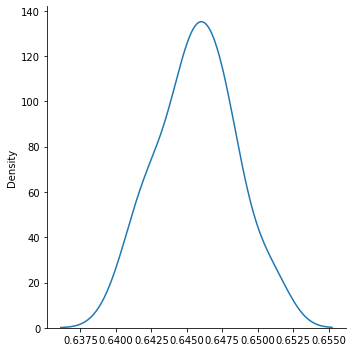

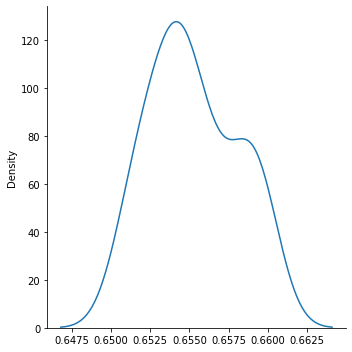

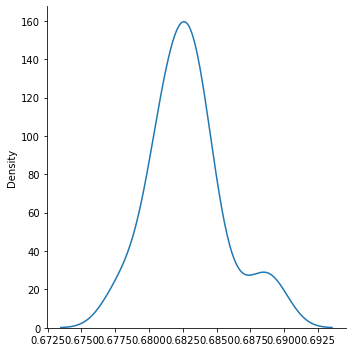

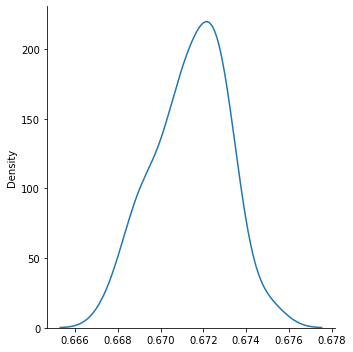

In [29]:
for model in results.columns:
  print(model)
  sns.displot(results[model].to_list(), kind = 'kde');

## ANOVA - Análise de Variação
O objetivo desse teste é verificar se a variação dos dados de cada grupo é
estatisticamente significativa.
- Amostra de dados precisam estar na distribuição normal (estatística
paramétrica)
- Calculamos a variação entre os grupos e a variação dentro dos grupos
- h0: não há diferença estatística
- h1: há diferença estatística

In [30]:
h0 = 'Resultados são estatistimente iguais'
h1 = 'Resultados são estatistimente diferentes'
alpha = 0.05

In [31]:
from scipy.stats import f_oneway
_, p = f_oneway(results_tree, results_forest, results_knn, results_log_reg, results_svm_lin, results_svm)
print(h1) if p <= alpha else print(h0)

Resultados são estatistimente diferentes


A ANOVA diz se existe ou não diferença entre os modelos, mas não diz qual ou quais modelos estão diferindo dos outros.  

Como os resultados são diferentes, precisamos utilizar o Teste Tukey para saber qual o melhor algoritmo, comparando com todas as combinações possíveis.  

Se os resultados fossem iguais, então essa fase não seria necessária.

## Teste Tukey
Usamos o teste Tukey para saber qual(is) modelos diferem.

In [32]:
# Precisamos concatenar os resultados
results_concatenate = {'accuracy':np.concatenate([results_tree, results_forest, results_knn, results_log_reg, results_svm_lin, results_svm]),
                       'algoritmo': ['tree']*30 + ['forest']*30 + ['knn']*30 + ['log_reg']*30 + ['svm_lin']*30 + ['svm']*30}
results_concatenate = pd.DataFrame(results_concatenate)
results_concatenate

,accuracy,algoritmo
0,0.688716,tree
1,0.685405,tree
2,0.690983,tree
3,0.693973,tree
4,0.687903,tree
...,...,...
175,0.673200,svm
176,0.667828,svm
177,0.673413,svm
178,0.669200,svm


In [33]:
from statsmodels.stats.multicomp import MultiComparison
algorithm_comparison = MultiComparison(results_concatenate['accuracy'], results_concatenate['algoritmo'])
tukey_test = algorithm_comparison.tukeyhsd()

Se `p-adj < alpha`, então rejeitamos h0 (resultados são diferentes h1)

In [34]:
print(tukey_test)

 Multiple Comparison of Means - Tukey HSD, FWER=0.05 
 group1  group2 meandiff p-adj  lower   upper  reject
-----------------------------------------------------
 forest     knn  -0.0729 0.001 -0.0749  -0.071   True
 forest log_reg  -0.0634 0.001 -0.0653 -0.0614   True
 forest     svm  -0.0472 0.001 -0.0491 -0.0453   True
 forest svm_lin  -0.0358 0.001 -0.0377 -0.0338   True
 forest    tree    -0.03 0.001  -0.032 -0.0281   True
    knn log_reg   0.0096 0.001  0.0076  0.0115   True
    knn     svm   0.0257 0.001  0.0238  0.0277   True
    knn svm_lin   0.0372 0.001  0.0352  0.0391   True
    knn    tree   0.0429 0.001  0.0409  0.0448   True
log_reg     svm   0.0162 0.001  0.0142  0.0181   True
log_reg svm_lin   0.0276 0.001  0.0256  0.0295   True
log_reg    tree   0.0333 0.001  0.0314  0.0353   True
    svm svm_lin   0.0114 0.001  0.0095  0.0134   True
    svm    tree   0.0172 0.001  0.0152  0.0191   True
svm_lin    tree   0.0057 0.001  0.0038  0.0077   True
----------------------------

O Random Forest obteve um desempenho acima dos demais, iremos utilizá-lo na base de teste

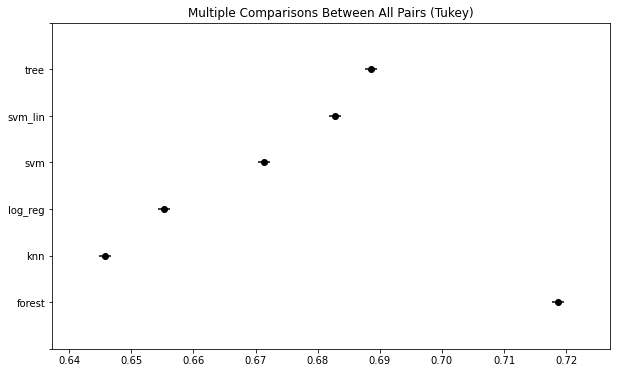

In [35]:
tukey_test.plot_simultaneous();

## Salvar classificador

In [36]:
forestClassifier = RandomForestClassifier(criterion = 'gini', class_weight = {0: 0.325, 1: 0.675}, min_samples_leaf = 3, min_samples_split = 5)
forestClassifier.fit(X_train_forest, y_train)

RandomForestClassifier(class_weight={0: 0.325, 1: 0.675}, min_samples_leaf=3,
                       min_samples_split=5)

In [37]:
pkl.dump(forestClassifier, open(path+'RandomForestClassifier.sav', 'wb'))